In [2]:
from funtions import Encrypt, writeCipherArrayInFile,InvertModulo #import all funtions
import os
import time
import math
import matplotlib.pyplot as plt

In [3]:
#this function takes p,q,public key and encrpt all msgs in inputMessages.txt
def encrptUsingN(p,q,pu):
  # remove cipherText to override it
  if os.path.exists("ciphertext.txt"):
    os.remove("ciphertext.txt")

  # calc n = p * q
  n = p * q
  msgs = []
  with open('inputMessages.txt') as f:
    msgs = f.readlines()
  for msg in msgs:
    msg=msg.rstrip('\n') # for remove \n at the end of string
    ciphertext = Encrypt(msg, n, pu)
    writeCipherArrayInFile(ciphertext,'ciphertext.txt')

In [4]:
# req 1,2
# try a single N from sharedData.txt and put all msgs you want to encrpt in inputMessages.txt
def singleTestCase():
  # read p,q, public key from the file
  lines = []
  with open('sharedData.txt') as f:
      lines = f.readlines()
  p = int(lines[0])
  q = int(lines[1])
  pu = int(lines[2])
  encrptUsingN(p,q,pu)


singleTestCase()

[0.5414218902587891, 0.003989696502685547, 0.0029921531677246094, 0.003991842269897461, 0.002991199493408203, 0.003987550735473633, 0.002992391586303711, 0.0029914379119873047]
[8, 17, 32, 37, 51, 60, 83, 196]


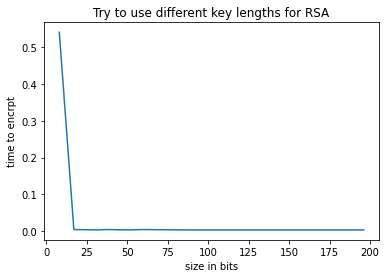

In [5]:
# req 3
# this function encrpt using differnt size of n
def encrptUsingDifferntNSize():
    lines = []
    with open('differentSizesN.txt') as f:
        lines = f.readlines()
    times=[]
    sizeOfN=[]
    for i in range(0,len(lines),3):
            p = int(lines[i])
            q = int(lines[i+1])
            pu = int(lines[i+2])
            start_time = time.time()
            encrptUsingN(p,q,pu)
            diff_time=(time.time() - start_time)
            times.append(diff_time)
            sizeOfN.append(int(math.log2(p*q)+1))
    print(times)
    print(sizeOfN)
    
    plt.plot(sizeOfN, times)
    # naming the x axis
    plt.xlabel('size in bits')
    # naming the y axis
    plt.ylabel('time to encrpt')

    # giving a title to my graph
    plt.title('Try to use different key lengths for RSA')

    # function to show the plot
    plt.show()

    
encrptUsingDifferntNSize()